## Dealing with Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

In [2]:
housing_df = pd.read_excel("/Volumes/T7/Career/School/MSADSB/BTA 520/housing2.xlsx")

Text(0, 0.5, 'Price ($)')

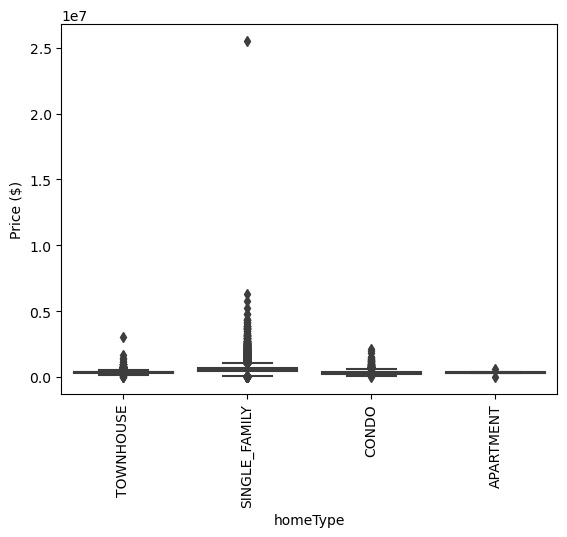

In [3]:
sns.boxplot(y = 'price', x= 'homeType', data= housing_df)
plt.xticks(rotation= 90)
plt.ylabel('Price ($)')

In [4]:
len(housing_df['price'])

21836

In [5]:
def remove_outlier_IQR(housing_df):
    Q1=housing_df.quantile(0.25)
    Q3=housing_df.quantile(0.75)
    IQR=Q3-Q1
    df_final=housing_df[~((housing_df<(Q1-1.5*IQR)) | (housing_df>(Q3+1.5*IQR)))]
    return df_final

Text(0, 0.5, 'Price ($)')

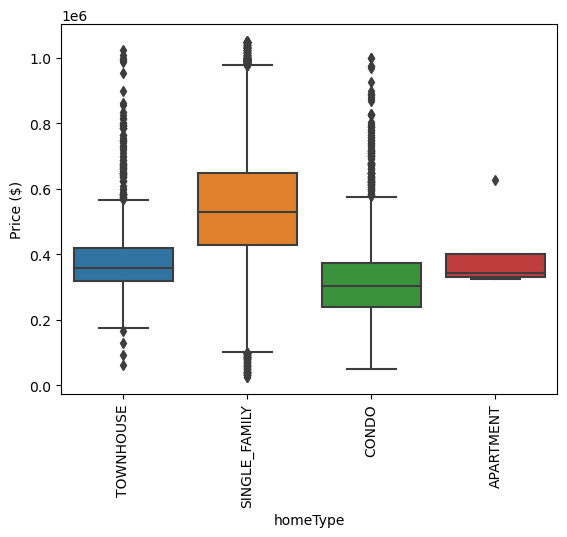

In [6]:
df_outlier_removed=remove_outlier_IQR(housing_df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=housing_df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=housing_df.drop([ind_diff[i]])
    housing_df=df_final
    
sns.boxplot(y='price', x='homeType',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [7]:
from jupyter_datatables import init_datatables_mode

In [8]:
init_datatables_mode()


CommError: Comms haven't been initialized properly.. HINT: Try reloading <F5> the window.